# Machine Learning Case Study


In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Here we are going to make model using two approaches  
- first using the traditional RFE method.
- second using the manual method of selecting features as per understanding 

## METHOD 1 --  RFE APPROACH

# Model Evaluation using RFE method

In [2]:
#loading the da
data1 =  pd.read_csv("day.csv")
data1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#evaluating data
data1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
data1.shape

(730, 16)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The dataset has 730 rows and 16 columns, with no null values, hence we do not need to impute or treat the data for null values

### Visualizing the Data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

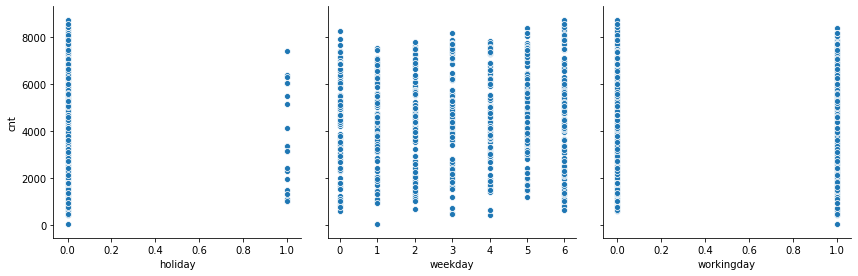

In [7]:
plt.figure()
sns.pairplot(data1, x_vars=['holiday', 'weekday', 'workingday'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

 - plot1 - This shows that bikes are hired more on non holiday days, rather than on holidays
 - plot2 - weekend have slightly higher cnt than weekdays, but still can be checked further
 - plot3 - graphs are almost similar for working and non working days

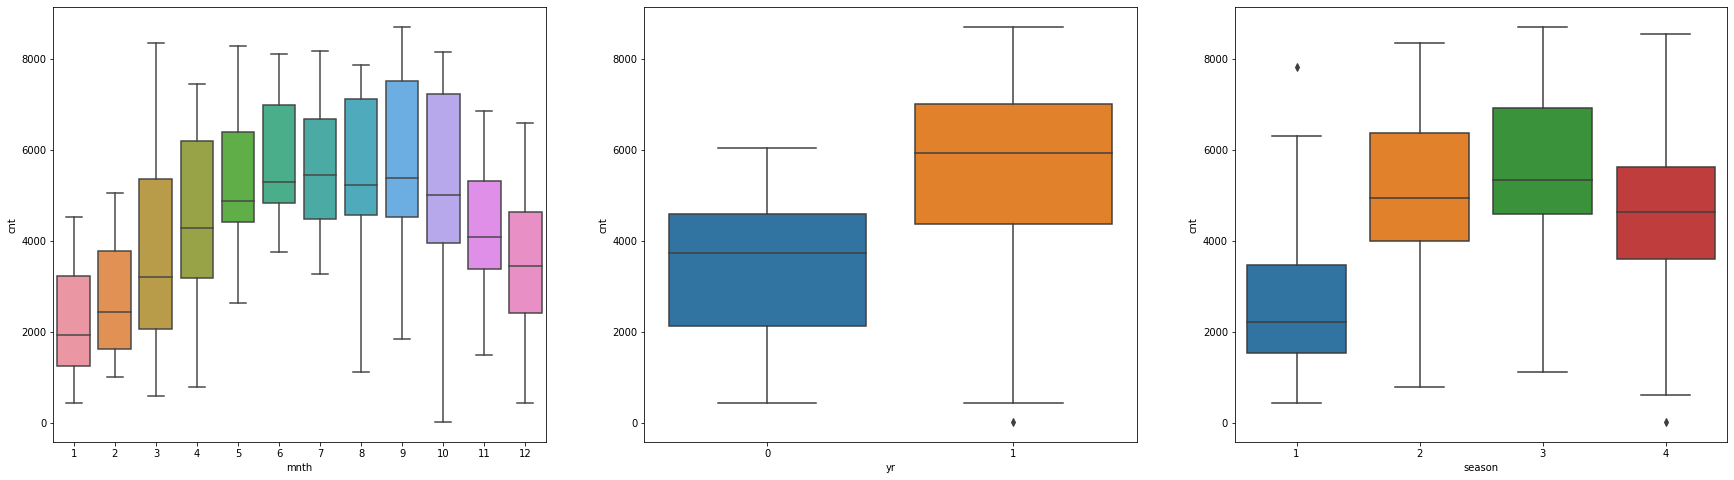

In [8]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
sns.boxplot(x = 'mnth' , y='cnt' , data=data1)
plt.subplot(1,3,2)
sns.boxplot(x = 'yr' , y='cnt' , data=data1)
plt.subplot(1,3,3)
sns.boxplot(x = 'season' , y='cnt' , data=data1)

plt.show()

 - plot1 - This shows that bikes are hired more in specific months 5,6,7,8,9,10 and fairly lesser in 1,2,3,12
 - plot2 - year 2019 had far more sales than year 2018
 - plot3 - spring had least cnt whereas summer fall have high cnt 

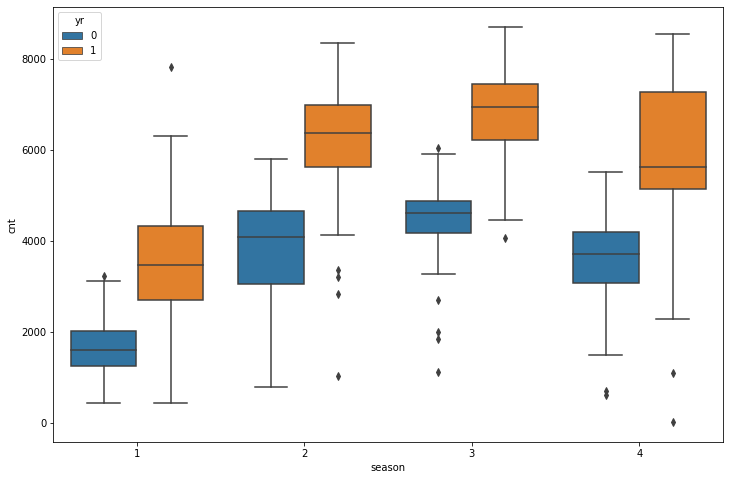

In [9]:
#checking seasons and year together 
plt.figure(figsize=(12,8))
sns.boxplot(x='season',y='cnt',hue='yr',data=data1)
plt.show()

 - sales for all the season is more in 2019 as compared to 2018

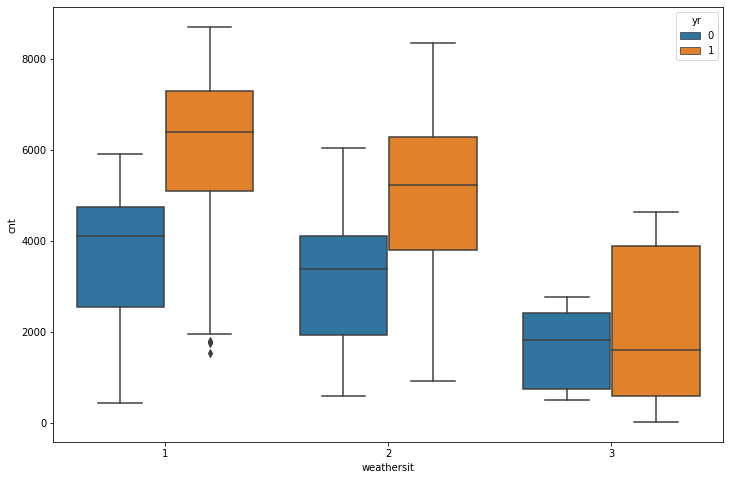

In [10]:
#checking weathersit per year w.r.t cnt
plt.figure(figsize=(12,8))
sns.boxplot(x='weathersit',y='cnt',hue='yr',data=data1)
plt.show()

 - No bicycles were taken in weathersit 4 i.e Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog due to obvious reasons.
 - More bicycles are hired in weathersit 1 i.e Clear, Few clouds, Partly cloudy, Partly cloudy
 - Least bicycles are hired in weathersit 3 i.e Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [11]:
#checking correlation in weather conditions and cnt
data_corr = data1[['cnt', 'temp','atemp','hum','windspeed']]
data_corr.corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


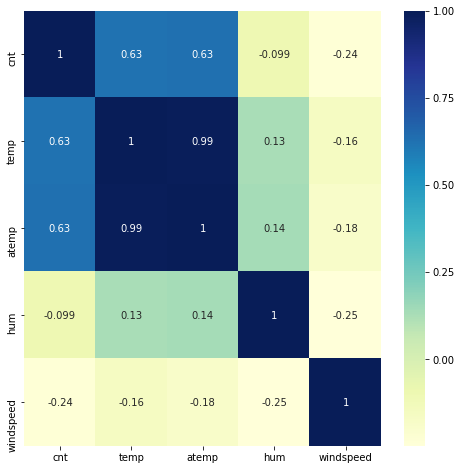

In [12]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(data_corr.corr(), annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

 - temp and atemp are fairly correlated to cnt
 - whereas on a windy day people dont tend to hire bikes, obvious reasons
 - humidity is also inversely related to bikes getting hired: more humid, lesser cnt

#### We have visualized all the predictors and have quite an idea about the dataset


### Data Preparation

In [13]:
#the dataset has some redundant columns which we need to remove
data1 = data1.drop(['instant','dteday','casual','registered'] , axis =1)

In [14]:
#normalizing season column
status = pd.get_dummies(data1['season'], drop_first = True)

In [15]:
status = status.rename(columns={2:"summer",3:"fall",4:"winter"})

In [16]:
status

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


we dropped one variable as for n variables you need n-1 dummy
 - 000 is season 1 - spring
 - 100 is season 2 - summer
 - 010 is season 3 - fall
 - 001 is season 4 - winter

In [17]:
data1 = pd.concat([data1,status],axis =1)

In [18]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [19]:
#normalizing season column
weather = pd.get_dummies(data1['weathersit'], drop_first = True)

In [20]:
weather = weather.rename(columns={2: "weather_2", 3: "weather_3"})
weather.head()

,weather_2,weather_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


we also dropped one variable as for n variables you need n-1 dummy
- 00 is  1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 10 is  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 01 is  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [21]:
data1 = pd.concat([data1,weather], axis =1)

In [22]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,weather_2,weather_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [23]:
data1['mnth'] = data1['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [24]:
mnth_1 = pd.get_dummies(data1['mnth'], drop_first = True)

In [25]:
data1 = pd.concat([data1,mnth_1], axis =1)

In [26]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [27]:
weekday = pd.get_dummies(data1['weekday'], drop_first = True)

In [28]:
weekday = weekday.rename(columns={1:"Mon",2:"Tues",3:"Wed",4:"Thrus",5:"Fri",6:"Sat"})

In [29]:
data1 = pd.concat([data1,weekday], axis =1)

In [30]:
data1.drop('weekday',axis=1,inplace=True)
data1.drop('season',axis=1,inplace=True)
data1.drop('weathersit',axis=1,inplace=True)
data1.drop(['mnth'],axis=1,inplace=True)

In [31]:
data1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'weather_2', 'weather_3', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Tues', 'Wed', 'Thrus', 'Fri', 'Sat'],
      dtype='object')

### TRAIN and TEST SPLIT

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
data_train , data_test = train_test_split(data1 , test_size = 0.3, train_size= 0.7, random_state=100)

In [34]:
print(data_test.shape)
print(data_train.shape)

(219, 30)
(510, 30)


#### Rescaling the Features

In [35]:
#Rescaling using min - maxfeatures. 
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

In [36]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,May,Nov,Oct,Sep,Mon,Tues,Wed,Thrus,Fri,Sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.245098,0.262745,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.430568,0.440557,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
numvars=['temp', 'atemp','hum','windspeed','cnt']
data_train[numvars] = scaler.fit_transform(data_train[numvars])
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,May,Nov,Oct,Sep,Mon,Tues,Wed,Thrus,Fri,Sat
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,May,Nov,Oct,Sep,Mon,Tues,Wed,Thrus,Fri,Sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


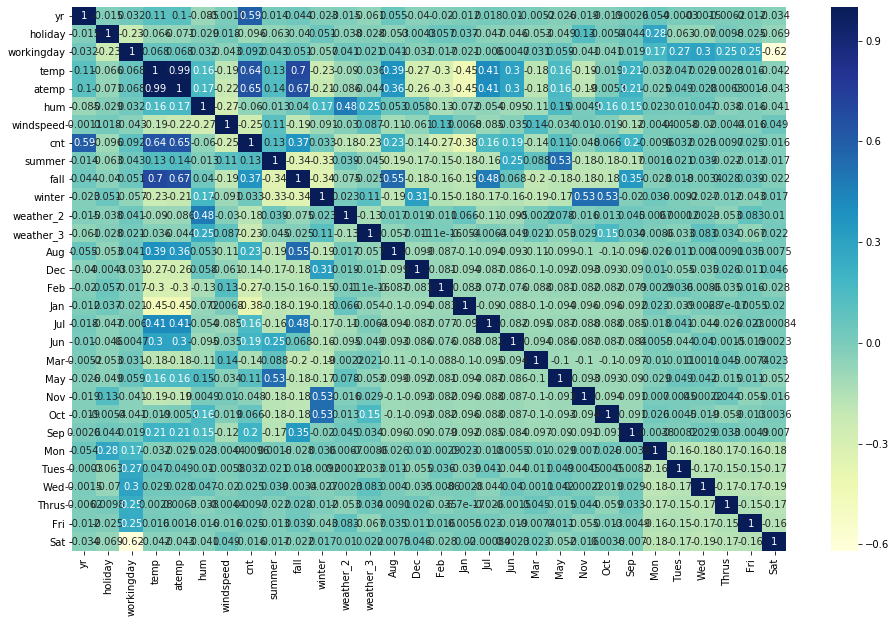

In [39]:
plt.figure(figsize = (16, 10))
ax = sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

### BUILDING MODELS

In [40]:
y_train = data_train.pop('cnt')
X_train = data_train

In [41]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,May,Nov,Oct,Sep,Mon,Tues,Wed,Thrus,Fri,Sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.245098,0.262745,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.430568,0.440557,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('weather_2', False, 3),
 ('weather_3', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 20),
 ('May', False, 11),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Mon', False, 13),
 ('Tues', False, 14),
 ('Wed', False, 17),
 ('Thrus', False, 19),
 ('Fri', False, 15),
 ('Sat', False, 4)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'weather_3', 'Jul', 'Sep'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'fall', 'weather_2', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Tues', 'Wed', 'Thrus', 'Fri',
       'Sat'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          2.91e-186
Time:                        18:57:54   Log-Likelihood:                 493.75
No. Observations:                 510   AIC:                            -965.5
Df Residuals:                     499   BIC:                            -918.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2689      0.026     10.313      0.0

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.28
2,temp,9.28
4,windspeed,3.54
0,yr,2.02
5,summer,1.76
6,winter,1.68
8,Jul,1.55
9,Sep,1.29
7,weather_3,1.09
1,holiday,1.04


##Manually removing independent variables

In [52]:
X_train_rfe.drop('hum',axis=1,inplace=True)

In [53]:
import statsmodels.api as sm

# Add a constant
X_train_rfe_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_rfe_lm2).fit()

In [54]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          6.68e-171
Time:                        18:57:54   Log-Likelihood:                 454.66
No. Observations:                 510   AIC:                            -889.3
Df Residuals:                     500   BIC:                            -847.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0836      0.018      4.765      0.0

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe_lm2 = X_train_rfe_lm2.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_rfe_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,summer,1.75
7,Jul,1.51
5,winter,1.43
8,Sep,1.28
6,weather_3,1.06
1,holiday,1.03


In [56]:
X_train_rfe_lm2.drop('Jul',axis=1,inplace=True)

In [57]:
import statsmodels.api as sm

# Add a constant
X_train_rfe_lm3 = sm.add_constant(X_train_rfe_lm2)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_rfe_lm3).fit()

In [58]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          1.42e-171
Time:                        18:57:54   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0872      0.017      5.001      0.0

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe_3 = X_train_rfe_lm3.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,summer,1.55
5,winter,1.35
7,Sep,1.20
6,weather_3,1.06
1,holiday,1.03


#### Above is the final model using RFE method

### Error Prediction

In [60]:
y_train_pred1 = lr.predict(X_train_rfe_lm3)

Text(0.5, 0, 'Errors')

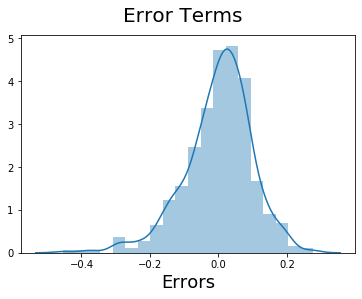

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- the error seems to be good and graph is almost centered to 0.

### Making predictions on the test model

In [62]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,May,Nov,Oct,Sep,Mon,Tues,Wed,Thrus,Fri,Sat
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,24.255828,61.961883,12.600130,4546.981735,0.264840,0.246575,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,7.689600,8.299641,14.456669,4.984858,1898.633630,0.442259,0.432005,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
numvars=['temp', 'atemp','hum','windspeed','cnt']
data_test[numvars] = scaler.fit_transform(data_test[numvars])

In [64]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
yr            219 non-null int64
holiday       219 non-null int64
workingday    219 non-null int64
temp          219 non-null float64
atemp         219 non-null float64
hum           219 non-null float64
windspeed     219 non-null float64
cnt           219 non-null float64
summer        219 non-null uint8
fall          219 non-null uint8
winter        219 non-null uint8
weather_2     219 non-null uint8
weather_3     219 non-null uint8
Aug           219 non-null uint8
Dec           219 non-null uint8
Feb           219 non-null uint8
Jan           219 non-null uint8
Jul           219 non-null uint8
Jun           219 non-null uint8
Mar           219 non-null uint8
May           219 non-null uint8
Nov           219 non-null uint8
Oct           219 non-null uint8
Sep           219 non-null uint8
Mon           219 non-null uint8
Tues          219 non-null uint8
Wed           219 non-null

In [65]:
y_test1 = data_test.pop('cnt')
X_test = data_test

In [66]:
X_test = X_test[['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'weather_3',
       'Sep']]
X_test_lm = sm.add_constant(X_test)

In [67]:
y_test_pred1 = lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

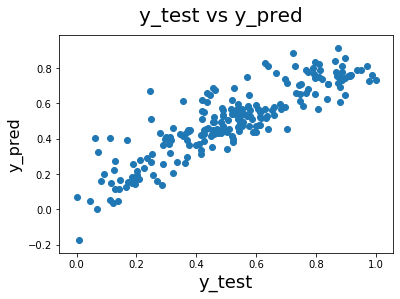

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test1, y_test_pred1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [69]:
lr1 = sm.OLS(y_test1, X_test_lm).fit()

In [70]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     94.80
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.96e-65
Time:                        18:57:56   Log-Likelihood:                 170.86
No. Observations:                 219   AIC:                            -323.7
Df Residuals:                     210   BIC:                            -293.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.031      0.497      0.6

As the R2 of test and train dataset is almost similar we can conclude that our model is good. 

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_test_pred1)

0.7635153717868592

## METHOD 2 -- Using Manual Method

## Loading and understanding the data

In [72]:
#loading the data
data =  pd.read_csv("day.csv")


In [73]:
#the dataset has instant column which is of now use, this can either be set index or dropped
data = data.drop('instant' , axis =1)

In [74]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Preparation

In [75]:
#normalizing season column
status = pd.get_dummies(data['season'], drop_first = True)

In [76]:
status = status.rename(columns={2:"summer",3:"fall",4:"winter"})

In [77]:
status

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


we dropped one variable as for n variables you need n-1 dummy
 - 000 is season 1 - spring
 - 100 is season 2 - summer
 - 010 is season 3 - fall
 - 001 is season 4 - winter

In [78]:
data = pd.concat([data,status],axis =1 )

In [79]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [80]:
#normalizing season column
weather = pd.get_dummies(data['weathersit'], drop_first = True)

In [81]:
weather.head()
weather.rename(columns={"2": "weather_2", "3": "weather_3"})

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [82]:
weather = weather.rename(columns={2: "weather_2", 3: "weather_3"})

we also dropped one variable as for n variables you need n-1 dummy
- 00 is  1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 10 is  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 01 is  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [83]:
data = pd.concat([data,weather], axis =1)

In [84]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,weather_2,weather_3
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [85]:
weekday = pd.get_dummies(data['weekday'], drop_first = True)

In [86]:
weekday.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [87]:
weekday = weekday.rename(columns={1:"Mon",2:"Tues",3:"Wed",4:"Thrus",5:"Fri",6:"Sat"})

In [88]:
data = pd.concat([data,weekday], axis =1)

In [89]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,fall,winter,weather_2,weather_3,Mon,Tues,Wed,Thrus,Fri,Sat
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,1
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,...,0,0,0,0,1,0,0,0,0,0
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,...,0,0,0,0,0,1,0,0,0,0
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,...,0,0,0,0,0,0,1,0,0,0


In [90]:
#dropping columns which are not of use to analysis
data.drop('weekday',axis=1,inplace=True)
data.drop('season',axis=1,inplace=True)
data.drop('weathersit',axis=1,inplace=True)
data.drop(['casual','registered','dteday','mnth'],axis=1,inplace=True)

In [91]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,weather_2,weather_3,Mon,Tues,Wed,Thrus,Fri,Sat
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0


### TRAIN and TEST SPLIT

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
data_test , data_train = train_test_split(data , test_size = 0.3, train_size= 0.7, random_state=100)

In [94]:
print(data_test.shape)
print(data_train.shape)

(510, 19)
(219, 19)


#### Rescaling the Features

In [95]:
#Rescaling using min - maxfeatures. 
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()


In [96]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,weather_2,weather_3,Mon,Tues,Wed,Thrus,Fri,Sat
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,1,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,0,0,0,0,1,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,1,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0,0,0,1,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,0,0,0,0,0,1,0,0


In [97]:
numvars=['temp', 'atemp','hum','windspeed','cnt']
data_train[numvars] = scaler.fit_transform(data_train[numvars])


In [98]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,weather_2,weather_3,Mon,Tues,Wed,Thrus,Fri,Sat
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.264840,0.246575,0.232877,0.319635,0.027397,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.442259,0.432005,0.423633,0.467403,0.163612,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


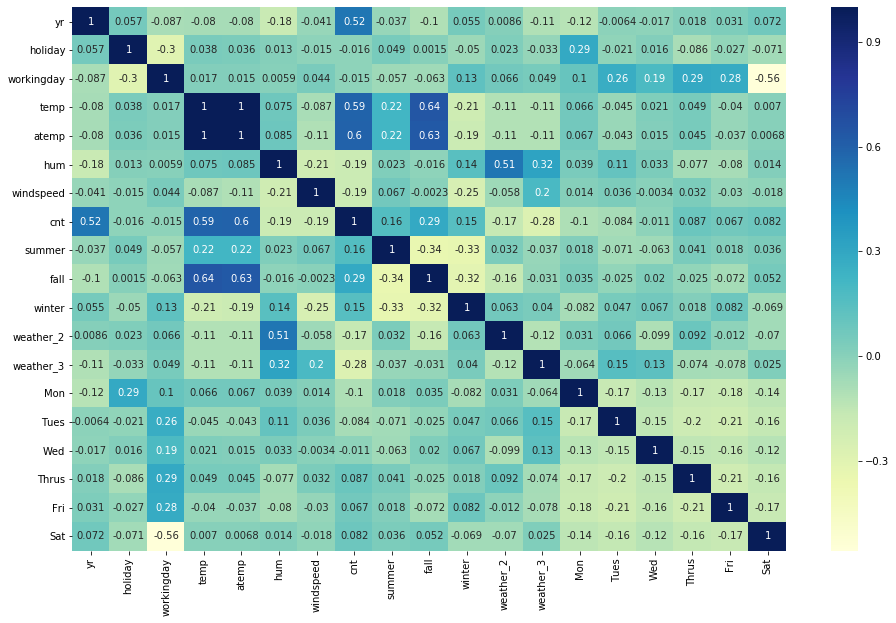

In [99]:
plt.figure(figsize = (16, 10))
ax = sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

- temp and atemp high correlation

### BUILDING MODELS

In [100]:
y_train = data_train.pop('cnt')
X_train = data_train

In [101]:
#changing datatypes 
X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'weather_2', 'weather_3', 'Mon', 'Tues',
       'Wed', 'Thrus', 'Fri', 'Sat']] = X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'weather_2', 'weather_3', 'Mon', 'Tues',
       'Wed', 'Thrus', 'Fri', 'Sat']].astype(float)

In [102]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
#X_train_lm.info()
# # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [103]:
lr.params

const         0.104250
yr            0.253368
holiday      -0.038619
workingday    0.023283
temp          0.193797
atemp         0.270068
hum          -0.144797
windspeed    -0.058880
summer        0.169071
fall          0.151560
winter        0.230039
weather_2    -0.033441
weather_3    -0.180500
Mon          -0.023060
Tues         -0.008551
Wed          -0.008363
Thrus         0.012936
Fri           0.011702
Sat           0.047136
dtype: float64

In [104]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     56.78
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           4.47e-67
Time:                        18:58:03   Log-Likelihood:                 196.01
No. Observations:                 219   AIC:                            -356.0
Df Residuals:                     201   BIC:                            -295.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1042      0.043      2.434      0.0

In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Thrus,inf
2,workingday,inf
1,holiday,inf
16,Fri,inf
12,Mon,inf
13,Tues,inf
14,Wed,inf
4,atemp,903.84
3,temp,853.79
5,hum,11.78


- atemp has high vif 903.84 and high pvalue of 0.481, hence dropping it.

In [107]:
X_train.drop('atemp',axis=1,inplace=True)

In [108]:
X_train_lm = sm.add_constant(X_train)

In [109]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [110]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     60.45
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           7.22e-68
Time:                        18:58:03   Log-Likelihood:                 195.74
No. Observations:                 219   AIC:                            -357.5
Df Residuals:                     202   BIC:                            -299.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1139      0.041      2.808      0.0

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Thrus,inf
2,workingday,inf
1,holiday,inf
15,Fri,inf
11,Mon,inf
12,Tues,inf
13,Wed,inf
3,temp,19.33
4,hum,10.54
7,fall,6.26


In [112]:
# workingday explains other days Mon Tue Wed Thrus Fri , hence we can just keep workingday in the dataset
X_train.drop(['Mon','Tues','Wed','Thrus','Fri'], axis=1,inplace=True)

In [113]:
#calculating vif again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,19.22
4,hum,10.30
7,fall,6.25
2,workingday,5.25
5,windspeed,4.56
6,summer,4.03
8,winter,2.46
9,weather_2,2.41
0,yr,1.89
11,Sat,1.70


In [114]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [115]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     80.97
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           4.45e-71
Time:                        18:58:04   Log-Likelihood:                 194.38
No. Observations:                 219   AIC:                            -362.8
Df Residuals:                     206   BIC:                            -318.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1171      0.040      2.902      0.0

 - there exist high corr between working day and holiday, hence we need to drop one of them.
 

In [116]:
X_train.drop('workingday', axis=1,inplace=True)

In [117]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [118]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     88.16
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           8.20e-72
Time:                        18:58:04   Log-Likelihood:                 193.76
No. Observations:                 219   AIC:                            -363.5
Df Residuals:                     207   BIC:                            -322.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1329      0.038      3.534      0.0

In [119]:
#calculating vif again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,17.82
3,hum,9.87
6,fall,6.08
5,summer,3.97
4,windspeed,3.94
7,winter,2.44
8,weather_2,2.41
0,yr,1.88
9,weather_3,1.39
10,Sat,1.18


- Sat has high p value hence removing it

In [120]:
X_train.drop('Sat', axis=1,inplace=True)

In [121]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [122]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     96.44
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.95e-72
Time:                        18:58:04   Log-Likelihood:                 192.83
No. Observations:                 219   AIC:                            -363.7
Df Residuals:                     208   BIC:                            -326.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1358      0.038      3.612      0.0

In [123]:
#calculating vif again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,17.72
3,hum,9.66
6,fall,6.04
4,windspeed,3.94
5,summer,3.94
7,winter,2.44
8,weather_2,2.38
0,yr,1.85
9,weather_3,1.39
1,holiday,1.05


In [124]:
X_train.drop('windspeed', axis=1,inplace=True)

In [125]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [126]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           6.15e-73
Time:                        18:58:04   Log-Likelihood:                 191.55
No. Observations:                 219   AIC:                            -363.1
Df Residuals:                     209   BIC:                            -329.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0953      0.027      3.481      0.0

In [127]:
#calculating vif again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.34
3,hum,9.19
5,fall,5.94
4,summer,3.93
6,winter,2.40
7,weather_2,2.38
0,yr,1.76
8,weather_3,1.36
1,holiday,1.05


In [128]:
X_train.drop('weather_2', axis=1,inplace=True)

In [129]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [130]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     117.4
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           3.46e-73
Time:                        18:58:04   Log-Likelihood:                 189.60
No. Observations:                 219   AIC:                            -361.2
Df Residuals:                     210   BIC:                            -330.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1054      0.027      3.896      0.0

In [131]:
#calculating vif again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.81
5,fall,5.93
3,hum,5.49
4,summer,3.93
6,winter,2.38
0,yr,1.75
7,weather_3,1.18
1,holiday,1.05


In [132]:
X_train.drop('holiday', axis=1,inplace=True)

In [133]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [134]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           2.24e-73
Time:                        18:58:04   Log-Likelihood:                 187.46
No. Observations:                 219   AIC:                            -358.9
Df Residuals:                     211   BIC:                            -331.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1056      0.027      3.876      0.0

In [135]:
#calculating vif again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.80
4,fall,5.93
2,hum,5.48
3,summer,3.93
5,winter,2.37
0,yr,1.75
6,weather_3,1.18


In [136]:
#since temp has extremly high vif dropping it
X_train.drop('temp', axis=1,inplace=True)

In [137]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [138]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           9.32e-61
Time:                        18:58:05   Log-Likelihood:                 154.63
No. Observations:                 219   AIC:                            -295.3
Df Residuals:                     212   BIC:                            -271.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2082      0.028      7.338      0.0

In [139]:
#calculating vif again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,3.88
4,winter,1.85
2,summer,1.83
3,fall,1.72
0,yr,1.63
5,weather_3,1.14


#### In above model all p values and vif are as expected now proceeding with predicting further values

### Error Prediction

In [140]:
y_train_pred = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

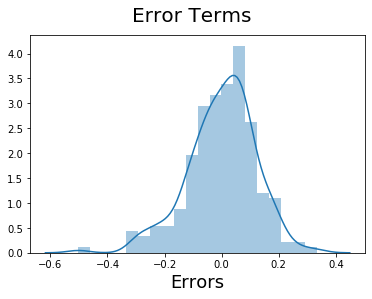

In [141]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- the error seems to be good and graph is almost centered to 0.

### Making predictions on the test model

In [142]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,weather_2,weather_3,Mon,Tues,Wed,Thrus,Fri,Sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.245098,0.262745,0.24902,0.343137,0.029412,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.430568,0.440557,0.43287,0.475223,0.169124,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
numvars=['temp', 'atemp','hum','windspeed','cnt']
data_test[numvars] = scaler.fit_transform(data_test[numvars])

In [144]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 19 columns):
yr            510 non-null int64
holiday       510 non-null int64
workingday    510 non-null int64
temp          510 non-null float64
atemp         510 non-null float64
hum           510 non-null float64
windspeed     510 non-null float64
cnt           510 non-null float64
summer        510 non-null uint8
fall          510 non-null uint8
winter        510 non-null uint8
weather_2     510 non-null uint8
weather_3     510 non-null uint8
Mon           510 non-null uint8
Tues          510 non-null uint8
Wed           510 non-null uint8
Thrus         510 non-null uint8
Fri           510 non-null uint8
Sat           510 non-null uint8
dtypes: float64(5), int64(3), uint8(11)
memory usage: 41.3 KB


In [145]:
y_test = data_test.pop('cnt')
X_test = data_test

In [146]:
X_test = X_test[['hum','weather_3','winter','fall','yr','summer']]
X_test_lm = sm.add_constant(X_test)

In [147]:
X_test_lm

,const,hum,weather_3,winter,fall,yr,summer
653,1.0,0.575354,0,1,0,1,0
576,1.0,0.725633,0,0,1,1,0
426,1.0,0.640189,0,0,0,1,0
728,1.0,0.498067,0,0,0,1,0
482,1.0,0.504508,0,0,0,1,1
...,...,...,...,...,...,...,...
526,1.0,0.605840,0,0,0,1,1
578,1.0,0.679690,0,0,1,1,0
53,1.0,0.435939,0,0,0,0,0
350,1.0,0.577930,0,1,0,0,0


In [148]:
y_test_pred = lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

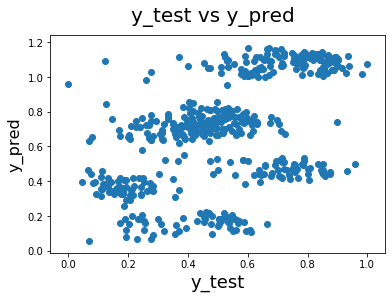

In [149]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [150]:
y_test_pred.describe()

count    510.000000
mean       0.675109
std        0.310644
min        0.057891
25%        0.424739
50%        0.709673
75%        1.004890
max        1.169382
dtype: float64

In [151]:
y_test.describe()

count    510.000000
mean       0.513620
std        0.224593
min        0.000000
25%        0.356420
50%        0.518638
75%        0.684710
max        1.000000
Name: cnt, dtype: float64

In [152]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

-1.0175122886416608

### The model using RFE method has a Rsquare of ~80, however the R2 score is much better than the manual approach. Hence RFE is a better method to develop a linear regression model. 